#### simple demonstration of how to use the Petfinder API to retrieve records of a random animal and produce some quick metadata as well as HQ image

In [2]:
import json


In [8]:
import requests


In [1]:
my_PF_key = '####'
my_PF_secret = '####'
# hidden here to avoid compromising my credentials

In [4]:
url = 'http://api.petfinder.com/pet.getRandom'

In [5]:
mydict = {'url':url, 'jsonp':'callback', 'dataType':'jsonp', 'data':{'key':my_PF_key, 'animal':'dog', 'location':'98106', 'output':'basic', 'format':'json'}}

In [10]:
import urllib.request


In [9]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&format=json'

In [12]:
data = json.load(urllib.request.urlopen(bigarg))


In [13]:
data

{'@encoding': 'iso-8859-1',
 '@version': '1.0',
 'petfinder': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  'petIds': {'id': {'$t': '43601552'}},
  'header': {'timestamp': {'$t': '2019-01-20T19:51:18Z'},
   'status': {'message': {}, 'code': {'$t': '100'}},
   'version': {'$t': '0.1'}},
  '@xsi:noNamespaceSchemaLocation': 'http://api.petfinder.com/schemas/0.9/petfinder.xsd'}}

In [14]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&output=basic&format=json'

In [15]:
data2 = json.load(urllib.request.urlopen(bigarg))


In [16]:
data2

{'@encoding': 'iso-8859-1',
 '@version': '1.0',
 'petfinder': {'pet': {'options': {'option': {'$t': 'altered'}},
   'status': {'$t': 'A'},
   'contact': {'phone': {'$t': '(919) 942-7387'},
    'state': {'$t': 'NC'},
    'address2': {},
    'email': {'$t': 'amorgan@orangecountync.gov'},
    'city': {'$t': 'Chapel Hill'},
    'zip': {'$t': '27516'},
    'fax': {},
    'address1': {'$t': '1601 Eubanks Road'}},
   'age': {'$t': 'Adult'},
   'size': {'$t': 'M'},
   'media': {'photos': {'photo': [{'@size': 'pnt',
       '$t': 'http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=60&-pnt.jpg',
       '@id': '1'},
      {'@size': 'fpm',
       '$t': 'http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=95&-fpm.jpg',
       '@id': '1'},
      {'@size': 'x',
       '$t': 'http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=500&-x.jpg',
       '@id': '1'},
      {'@size': 'pn',
       '$t': 'http://photos.petfinder.com/photos/pets/43

In [19]:
json_string = json.dumps(data2)


In [20]:
json_string

'{"@encoding": "iso-8859-1", "@version": "1.0", "petfinder": {"pet": {"options": {"option": {"$t": "altered"}}, "status": {"$t": "A"}, "contact": {"phone": {"$t": "(919) 942-7387"}, "state": {"$t": "NC"}, "address2": {}, "email": {"$t": "amorgan@orangecountync.gov"}, "city": {"$t": "Chapel Hill"}, "zip": {"$t": "27516"}, "fax": {}, "address1": {"$t": "1601 Eubanks Road"}}, "age": {"$t": "Adult"}, "size": {"$t": "M"}, "media": {"photos": {"photo": [{"@size": "pnt", "$t": "http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=60&-pnt.jpg", "@id": "1"}, {"@size": "fpm", "$t": "http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=95&-fpm.jpg", "@id": "1"}, {"@size": "x", "$t": "http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=500&-x.jpg", "@id": "1"}, {"@size": "pn", "$t": "http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=300&-pn.jpg", "@id": "1"}, {"@size": "t", "$t": "http://photos.petfinder.com/ph

In [52]:
jsonstringsplit = json_string.split(",")

In [26]:
import matplotlib.pyplot as plt

In [33]:
from skimage import io


In [34]:
picURL = 'http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=50&-t.jpg'

In [47]:
coco= urllib.request.urlopen(picURL)

In [48]:
cocoro = plt.imread(coco, format='jpg')


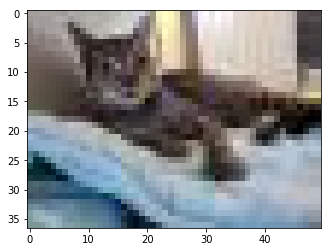

In [50]:
plt.imshow(cocoro)

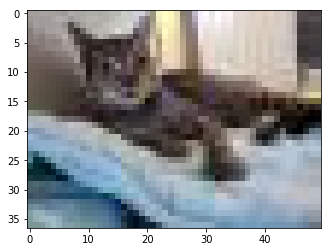

In [51]:
image = io.imread(picURL)
plt.imshow(image)
plt.show()


http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=60&-pnt.jpg


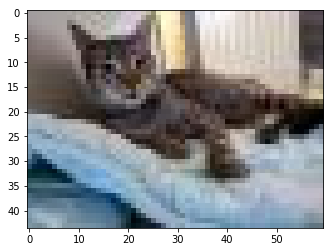

http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=95&-fpm.jpg


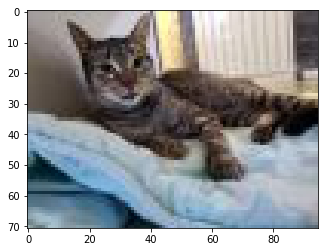

http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=500&-x.jpg


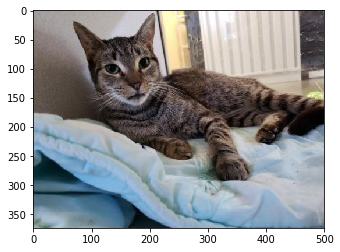

http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=300&-pn.jpg


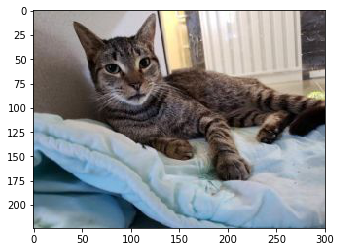

http://photos.petfinder.com/photos/pets/43804504/1/?bust=1547813064&width=50&-t.jpg


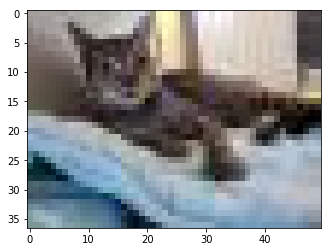

In [57]:
for i, theline in enumerate(jsonstringsplit):
    cleanedline = theline.replace('"', '')
    linesegments = cleanedline.split(' ')
    for segment in linesegments:
        if '.jpg' in segment:
            print(segment)
            image = io.imread(segment)
            plt.imshow(image)
            plt.show()

            plt.close()

http://photos.petfinder.com/photos/pets/43211483/1/?bust=1541436455&width=60&-pnt.jpg
http://photos.petfinder.com/photos/pets/43211483/1/?bust=1541436455&width=95&-fpm.jpg
http://photos.petfinder.com/photos/pets/43211483/1/?bust=1541436455&width=500&-x.jpg


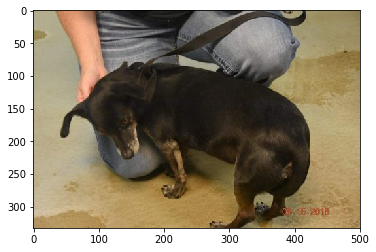

http://photos.petfinder.com/photos/pets/43211483/1/?bust=1541436455&width=300&-pn.jpg
http://photos.petfinder.com/photos/pets/43211483/1/?bust=1541436455&width=50&-t.jpg
http://photos.petfinder.com/photos/pets/43211483/2/?bust=1541436458&width=60&-pnt.jpg
http://photos.petfinder.com/photos/pets/43211483/2/?bust=1541436458&width=95&-fpm.jpg
http://photos.petfinder.com/photos/pets/43211483/2/?bust=1541436458&width=500&-x.jpg


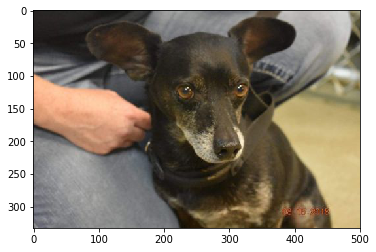

http://photos.petfinder.com/photos/pets/43211483/2/?bust=1541436458&width=300&-pn.jpg
http://photos.petfinder.com/photos/pets/43211483/2/?bust=1541436458&width=50&-t.jpg
http://photos.petfinder.com/photos/pets/43211483/3/?bust=1541436461&width=60&-pnt.jpg
http://photos.petfinder.com/photos/pets/43211483/3/?bust=1541436461&width=95&-fpm.jpg
http://photos.petfinder.com/photos/pets/43211483/3/?bust=1541436461&width=500&-x.jpg


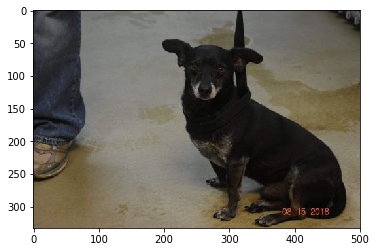

http://photos.petfinder.com/photos/pets/43211483/3/?bust=1541436461&width=300&-pn.jpg
http://photos.petfinder.com/photos/pets/43211483/3/?bust=1541436461&width=50&-t.jpg
http://photos.petfinder.com/photos/pets/43211483/4/?bust=1541436462&width=60&-pnt.jpg
http://photos.petfinder.com/photos/pets/43211483/4/?bust=1541436462&width=95&-fpm.jpg
http://photos.petfinder.com/photos/pets/43211483/4/?bust=1541436462&width=500&-x.jpg


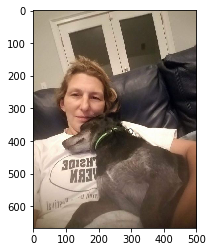

http://photos.petfinder.com/photos/pets/43211483/4/?bust=1541436462&width=300&-pn.jpg
http://photos.petfinder.com/photos/pets/43211483/4/?bust=1541436462&width=50&-t.jpg
http://photos.petfinder.com/photos/pets/43211483/5/?bust=1541436464&width=60&-pnt.jpg
http://photos.petfinder.com/photos/pets/43211483/5/?bust=1541436464&width=95&-fpm.jpg
http://photos.petfinder.com/photos/pets/43211483/5/?bust=1541436464&width=500&-x.jpg


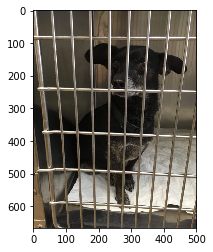

http://photos.petfinder.com/photos/pets/43211483/5/?bust=1541436464&width=300&-pn.jpg
http://photos.petfinder.com/photos/pets/43211483/5/?bust=1541436464&width=50&-t.jpg
http://photos.petfinder.com/photos/pets/43211483/6/?bust=1541436466&width=60&-pnt.jpg
http://photos.petfinder.com/photos/pets/43211483/6/?bust=1541436466&width=95&-fpm.jpg
http://photos.petfinder.com/photos/pets/43211483/6/?bust=1541436466&width=500&-x.jpg


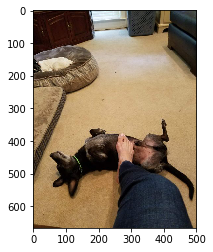

http://photos.petfinder.com/photos/pets/43211483/6/?bust=1541436466&width=300&-pn.jpg
http://photos.petfinder.com/photos/pets/43211483/6/?bust=1541436466&width=50&-t.jpg
 breeds: {breed: {$t: Dachshund}}
 name: {$t: Tater Tot}
 sex: {$t: M}


In [62]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&animal=dog&output=basic&format=json'

data2 = json.load(urllib.request.urlopen(bigarg))

json_string = json.dumps(data2)

jsonstringsplit = json_string.split(",")

name_of_dog = 'unknown'
breed_of_dog = 'unknown'
gender_of_dog = 'unknown'

for i, theline in enumerate(jsonstringsplit):
    cleanedline = theline.replace('"', '')
    if 'name' in cleanedline:
        print(cleanedline)
        name_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        
    if 'breed' in cleanedline:
        print(cleanedline)
        breed_of_dog = cleanedline.split(' ')[-1].replace('}', '')

    if ('sex') in cleanedline:
        print(cleanedline)
        sex_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        if sex_of_dog == 'M':
            gender_of_dog = 'boy'
        elif sex_of_dog == 'F':
            gender_of_dog = 'girl'

    
    linesegments = cleanedline.split(' ')
    for segment in linesegments:
        if '.jpg' in segment:
            print(segment)
            if '500&-x.jpg' in segment:
                image = io.imread(segment)
                plt.imshow(image)
                plt.show()
                plt.close()


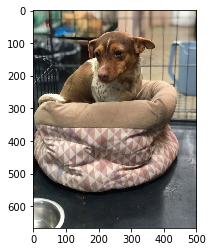

 breeds: {breed: [{$t: Chihuahua}
 name: {$t: Franklin}
 sex: {$t: M}
Franklin the Chihuahua is a good boy


In [63]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&animal=dog&output=basic&format=json'

data2 = json.load(urllib.request.urlopen(bigarg))

json_string = json.dumps(data2)

jsonstringsplit = json_string.split(",")

name_of_dog = 'unknown'
breed_of_dog = 'unknown'
gender_of_dog = 'unknown'

for i, theline in enumerate(jsonstringsplit):
    cleanedline = theline.replace('"', '')
    if 'name' in cleanedline:
        #print(cleanedline)
        name_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        
    if 'breed' in cleanedline:
        #print(cleanedline)
        breed_of_dog = cleanedline.split(' ')[-1].replace('}', '')

    if ('sex') in cleanedline:
        #print(cleanedline)
        sex_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        if sex_of_dog == 'M':
            gender_of_dog = 'boy'
        elif sex_of_dog == 'F':
            gender_of_dog = 'girl'

    
    linesegments = cleanedline.split(' ')
    for segment in linesegments:
        if '.jpg' in segment:
            #print(segment)
            if '500&-x.jpg' in segment:
                image = io.imread(segment)
                plt.imshow(image)
                plt.show()
                plt.close()
print(name_of_dog+' the '+breed_of_dog+' is a good '+gender_of_dog)

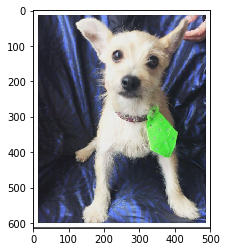

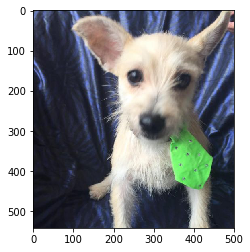

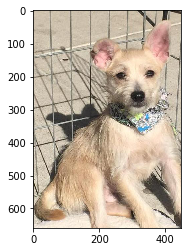

Will the Terrier is a good boy


In [64]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&animal=dog&output=basic&format=json'

data2 = json.load(urllib.request.urlopen(bigarg))

json_string = json.dumps(data2)

jsonstringsplit = json_string.split(",")

name_of_dog = 'unknown'
breed_of_dog = 'unknown'
gender_of_dog = 'unknown'

for i, theline in enumerate(jsonstringsplit):
    cleanedline = theline.replace('"', '')
    if 'name' in cleanedline:
        #print(cleanedline)
        name_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        
    if 'breed' in cleanedline:
        #print(cleanedline)
        breed_of_dog = cleanedline.split(' ')[-1].replace('}', '')

    if ('sex') in cleanedline:
        #print(cleanedline)
        sex_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        if sex_of_dog == 'M':
            gender_of_dog = 'boy'
        elif sex_of_dog == 'F':
            gender_of_dog = 'girl'

    
    linesegments = cleanedline.split(' ')
    for segment in linesegments:
        if '.jpg' in segment:
            #print(segment)
            if '500&-x.jpg' in segment:
                image = io.imread(segment)
                plt.imshow(image)
                plt.show()
                plt.close()
print(name_of_dog+' the '+breed_of_dog+' is a good '+gender_of_dog)

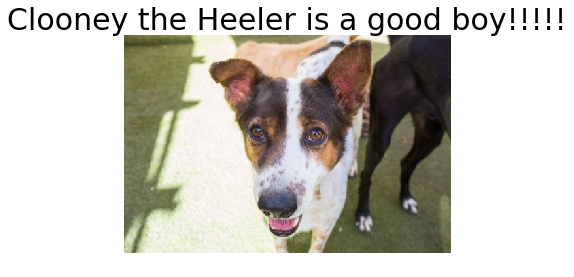

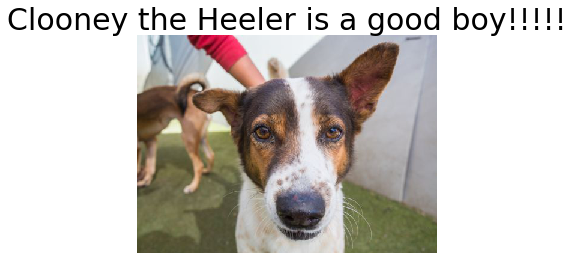

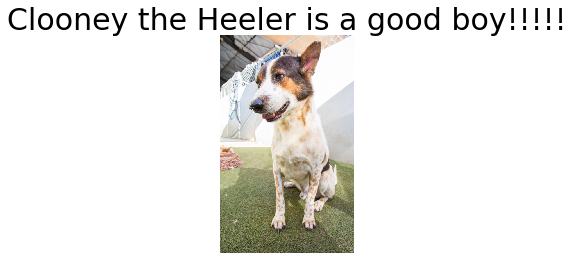

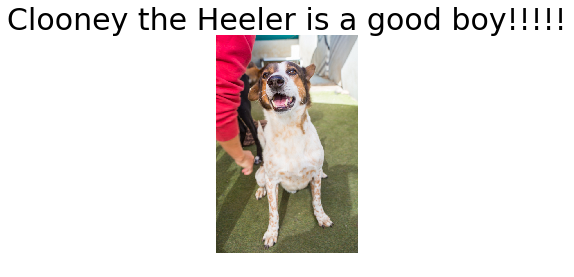

http://photos.petfinder.com/photos/pets/43730592/5/?bust=1547060735&width=500&-x.jpg


In [66]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&animal=dog&output=basic&format=json'

data2 = json.load(urllib.request.urlopen(bigarg))

json_string = json.dumps(data2)

jsonstringsplit = json_string.split(",")

name_of_dog = 'Unknown'
breed_of_dog = 'Unknown'
gender_of_dog = 'Unknown'

pic_ur_list = []

for i, theline in enumerate(jsonstringsplit):
    cleanedline = theline.replace('"', '')
    if 'name' in cleanedline:
        #print(cleanedline)
        name_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        
    if 'breed' in cleanedline:
        #print(cleanedline)
        breed_of_dog = cleanedline.split(' ')[-1].replace('}', '')

    if ('sex') in cleanedline:
        #print(cleanedline)
        sex_of_dog = cleanedline.split(' ')[-1].replace('}', '')
        if sex_of_dog == 'M':
            gender_of_dog = 'boy'
        elif sex_of_dog == 'F':
            gender_of_dog = 'girl'

    
    linesegments = cleanedline.split(' ')
    for segment in linesegments:
        if '.jpg' in segment:
            #print(segment)
            if '500&-x.jpg' in segment:
                pic_ur_list.append(segment)

for theurl in pic_ur_list:
    image = io.imread(theurl)
    plt.imshow(image)
    plt.title(name_of_dog+' the '+breed_of_dog+' is a good '+gender_of_dog+'!!!!!', fontsize=30)
    plt.axis('off')
    plt.show()
    plt.close()

print(pic_ur_list[-1])


In [79]:
def show_random_friend():
    bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&animal=dog&output=basic&format=json'

    data2 = json.load(urllib.request.urlopen(bigarg))

    json_string = json.dumps(data2)

    jsonstringsplit = json_string.split(",")

    name_of_dog = 'Unknown'
    breed_of_dog = 'Unknown'
    gender_of_dog = 'Unknown'

    pic_ur_list = []

    for i, theline in enumerate(jsonstringsplit):
        cleanedline = theline.replace('"', '')
        if 'name' in cleanedline:
            #print(cleanedline)
            name_of_dog = cleanedline.split(' ')[-1].replace('}', '')

        if 'breed' in cleanedline:
            #print(cleanedline)
            breed_of_dog = cleanedline.split(' ')[-1].replace('}', '')

        if ('sex') in cleanedline:
            #print(cleanedline)
            sex_of_dog = cleanedline.split(' ')[-1].replace('}', '')
            if sex_of_dog == 'M':
                gender_of_dog = 'boy'
            elif sex_of_dog == 'F':
                gender_of_dog = 'girl'


        linesegments = cleanedline.split(' ')
        for segment in linesegments:
            if '.jpg' in segment:
                #print(segment)
                if '500&-x.jpg' in segment:
                    pic_ur_list.append(segment)

    for theurl in pic_ur_list:
        image = io.imread(theurl)
        plt.imshow(image)
        plt.title(name_of_dog+' the '+breed_of_dog+' is a good '+gender_of_dog+'!!!!!', fontsize=30)
        plt.axis('off')
        plt.show()
        plt.close()

    print(pic_ur_list[-1])


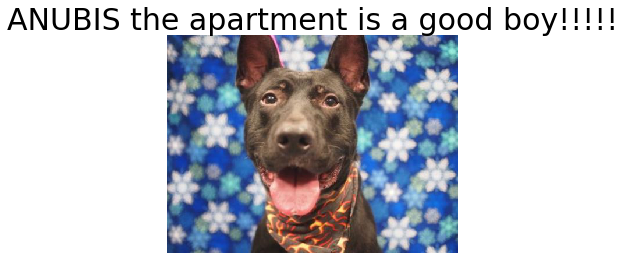

http://photos.petfinder.com/photos/pets/43765441/1/?bust=1547407720&width=500&-x.jpg


In [68]:
show_random_friend()

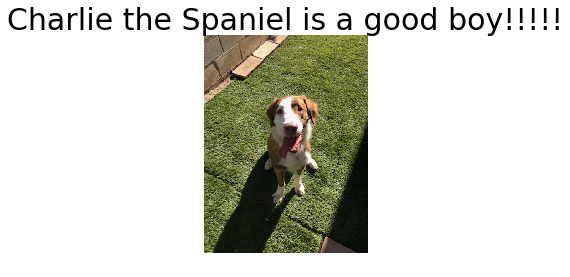

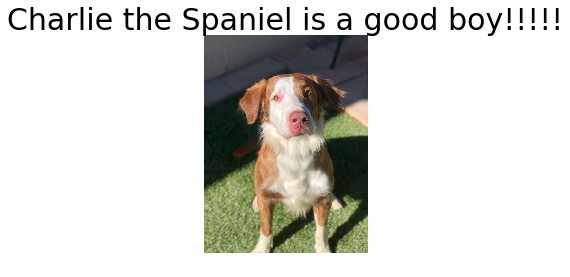

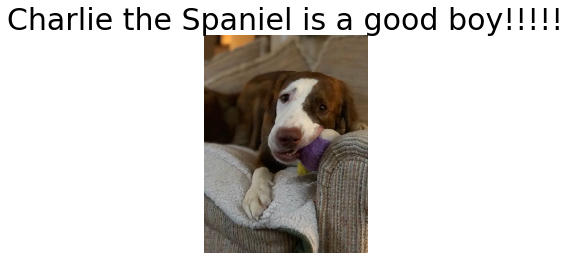

http://photos.petfinder.com/photos/pets/43591316/4/?bust=1545327650&width=500&-x.jpg


In [69]:
show_random_friend()

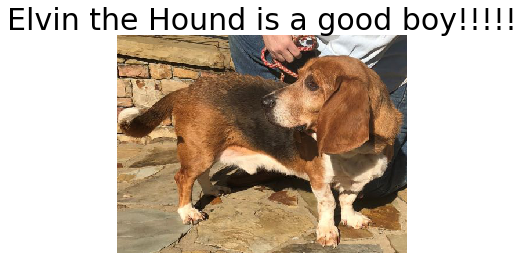

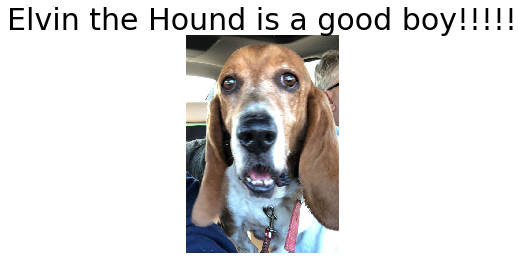

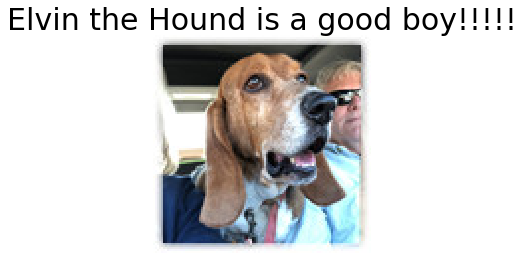

http://photos.petfinder.com/photos/pets/40669293/3/?bust=1528574910&width=500&-x.jpg


In [70]:
show_random_friend()

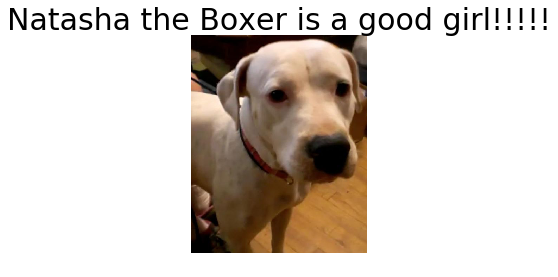

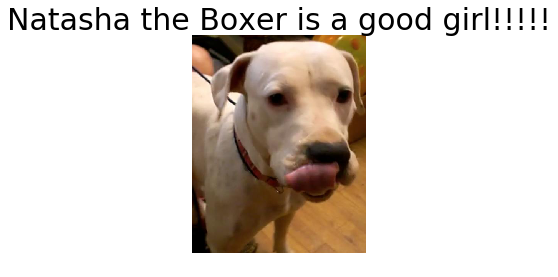

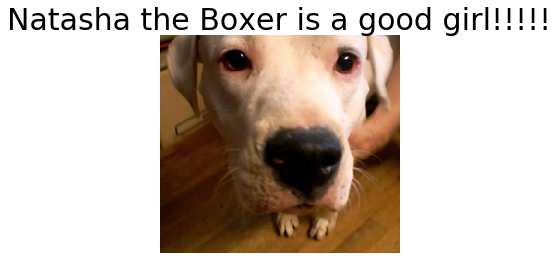

http://photos.petfinder.com/photos/pets/30675721/3/?bust=1492743518&width=500&-x.jpg


In [71]:
show_random_friend()

In [72]:
bigarg = 'http://api.petfinder.com/pet.getRandom?key='+my_PF_key+'&animal=dog&output=full&format=json'

data2 = json.load(urllib.request.urlopen(bigarg))

In [73]:
data2

{'@encoding': 'iso-8859-1',
 '@version': '1.0',
 'petfinder': {'pet': {'options': {'option': {'$t': 'hasShots'}},
   'status': {'$t': 'A'},
   'contact': {'phone': {},
    'state': {'$t': 'CO'},
    'address2': {},
    'email': {'$t': 'adopt@4p4l.org'},
    'city': {'$t': 'Sedalia'},
    'zip': {'$t': '80135'},
    'fax': {},
    'address1': {}},
   'age': {'$t': 'Young'},
   'size': {'$t': 'M'},
   'media': {'photos': {'photo': [{'@size': 'pnt',
       '$t': 'http://photos.petfinder.com/photos/pets/43764592/1/?bust=1548000183&width=60&-pnt.jpg',
       '@id': '1'},
      {'@size': 'fpm',
       '$t': 'http://photos.petfinder.com/photos/pets/43764592/1/?bust=1548000183&width=95&-fpm.jpg',
       '@id': '1'},
      {'@size': 'x',
       '$t': 'http://photos.petfinder.com/photos/pets/43764592/1/?bust=1548000183&width=500&-x.jpg',
       '@id': '1'},
      {'@size': 'pn',
       '$t': 'http://photos.petfinder.com/photos/pets/43764592/1/?bust=1548000183&width=300&-pn.jpg',
       '@id': '1

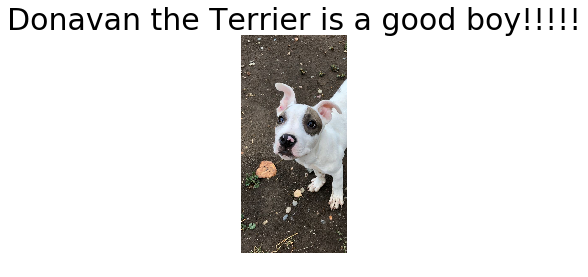

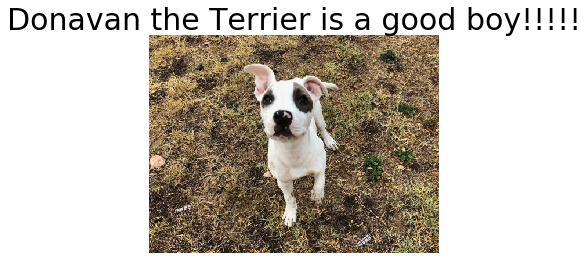

http://photos.petfinder.com/photos/pets/43104241/2/?bust=1540437125&width=500&-x.jpg


In [74]:
show_random_frined()


TODO:  write a flask app that shows this on the web?

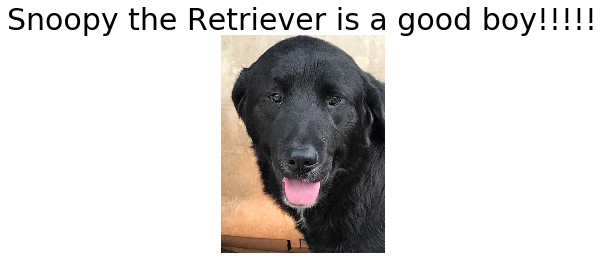

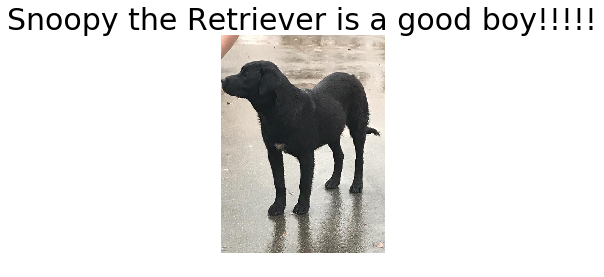

http://photos.petfinder.com/photos/pets/43590792/2/?bust=1547935413&width=500&-x.jpg


In [75]:
show_random_friend()


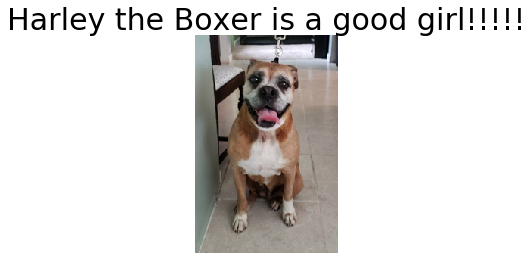

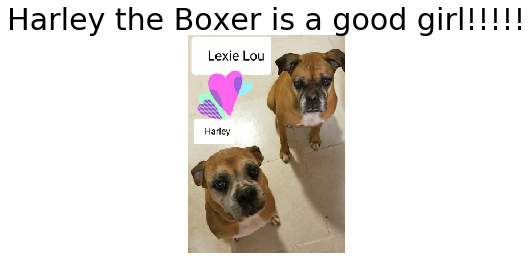

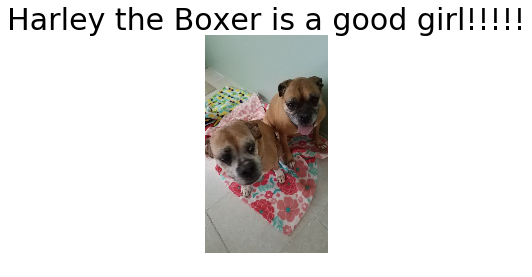

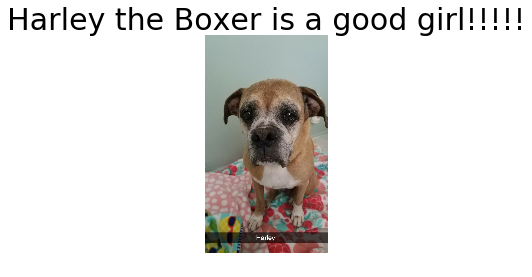

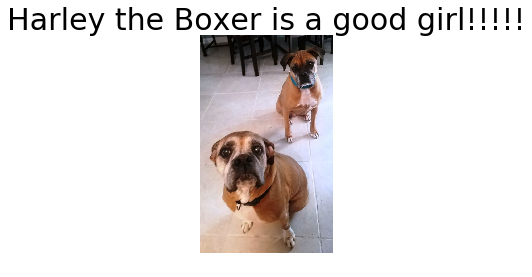

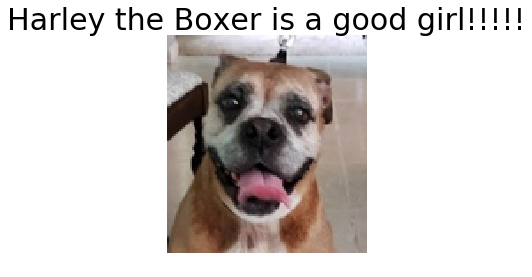

http://photos.petfinder.com/photos/pets/41827033/6/?bust=1540148250&width=500&-x.jpg


In [76]:
show_random_friend()


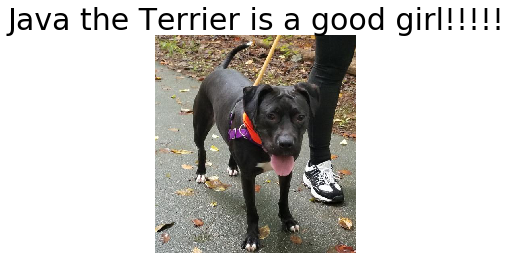

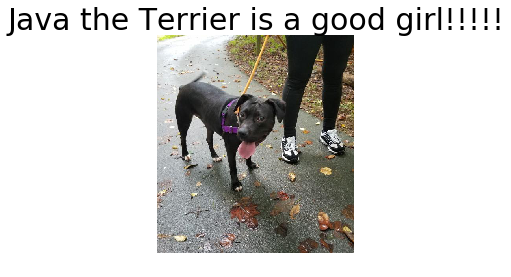

http://photos.petfinder.com/photos/pets/40225800/2/?bust=1536635743&width=500&-x.jpg


In [77]:
show_random_friend()


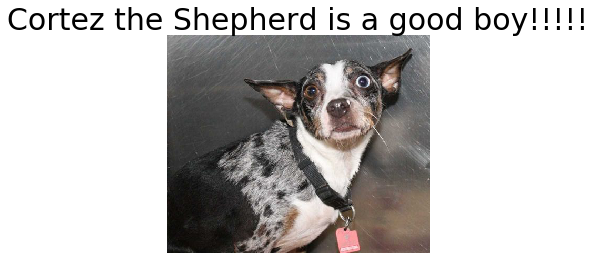

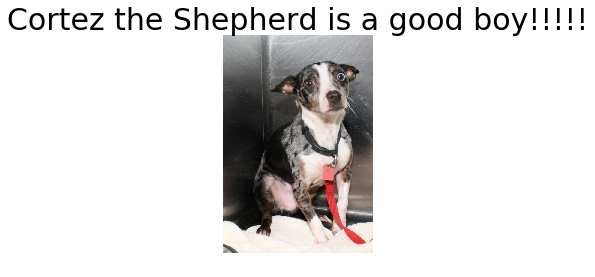

http://photos.petfinder.com/photos/pets/42575694/2/?bust=1547996789&width=500&-x.jpg


In [78]:
show_random_friend()


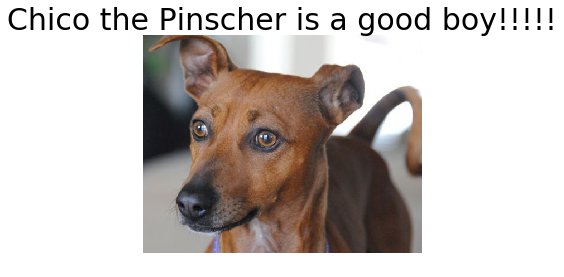

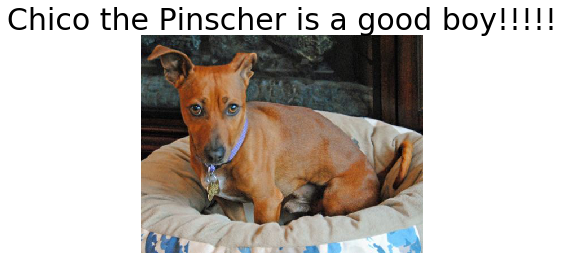

http://photos.petfinder.com/photos/pets/43484178/2/?bust=1544205587&width=500&-x.jpg


In [80]:
show_random_friend()